In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
data = pd.read_csv('/content/drive/MyDrive/Notebooks/module 5 linear Regression/1. predictive model and linear regression/Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [27]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

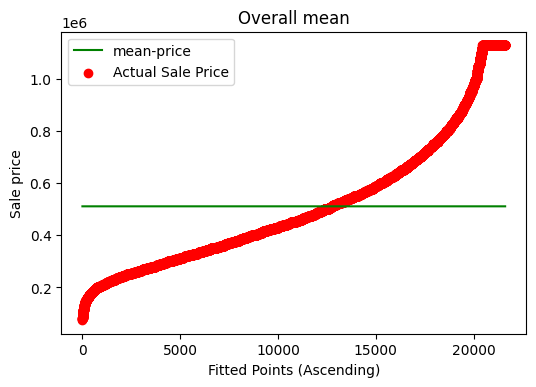

In [28]:
# observing value we predicted by plotting graph
plt.figure(dpi = 100) # resolution of the image
k = range(0,len(data)) # list k acts as a index x axis
plt.scatter(k,data['Sale_Price'].sort_values(),color = 'red',label = 'Actual Sale Price') # sale price is ascending order
plt.plot(k,data['mean_sales'].sort_values(),color = 'green' , label = 'mean-price')
plt.xlabel('Fitted Points (Ascending)')
plt.ylabel('Sale price')
plt.title('Overall mean')
plt.legend()

In [29]:
# improving upon the mean regression model
# average sale price with respect to overall grade
# any categorical variable 
grades_mean = data.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc= np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [30]:
grades_mean[3][0]

205666.66666666666

In [31]:
data['grade_mean'] = 0
for i in grades_mean.columns:
  data['grade_mean'][data['Overall Grade']==i] = grades_mean[i][0]
data['grade_mean'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [32]:
gradewise_list = []
for i in range(1,11):
  k = data['Sale_Price'][data['Overall Grade']==i]
  gradewise_list.append(k)

In [33]:
classwise_list = []
for i in range(1,11):
  k = data['Sale_Price'][data['Overall Grade']==i]
  classwise_list.append(k)

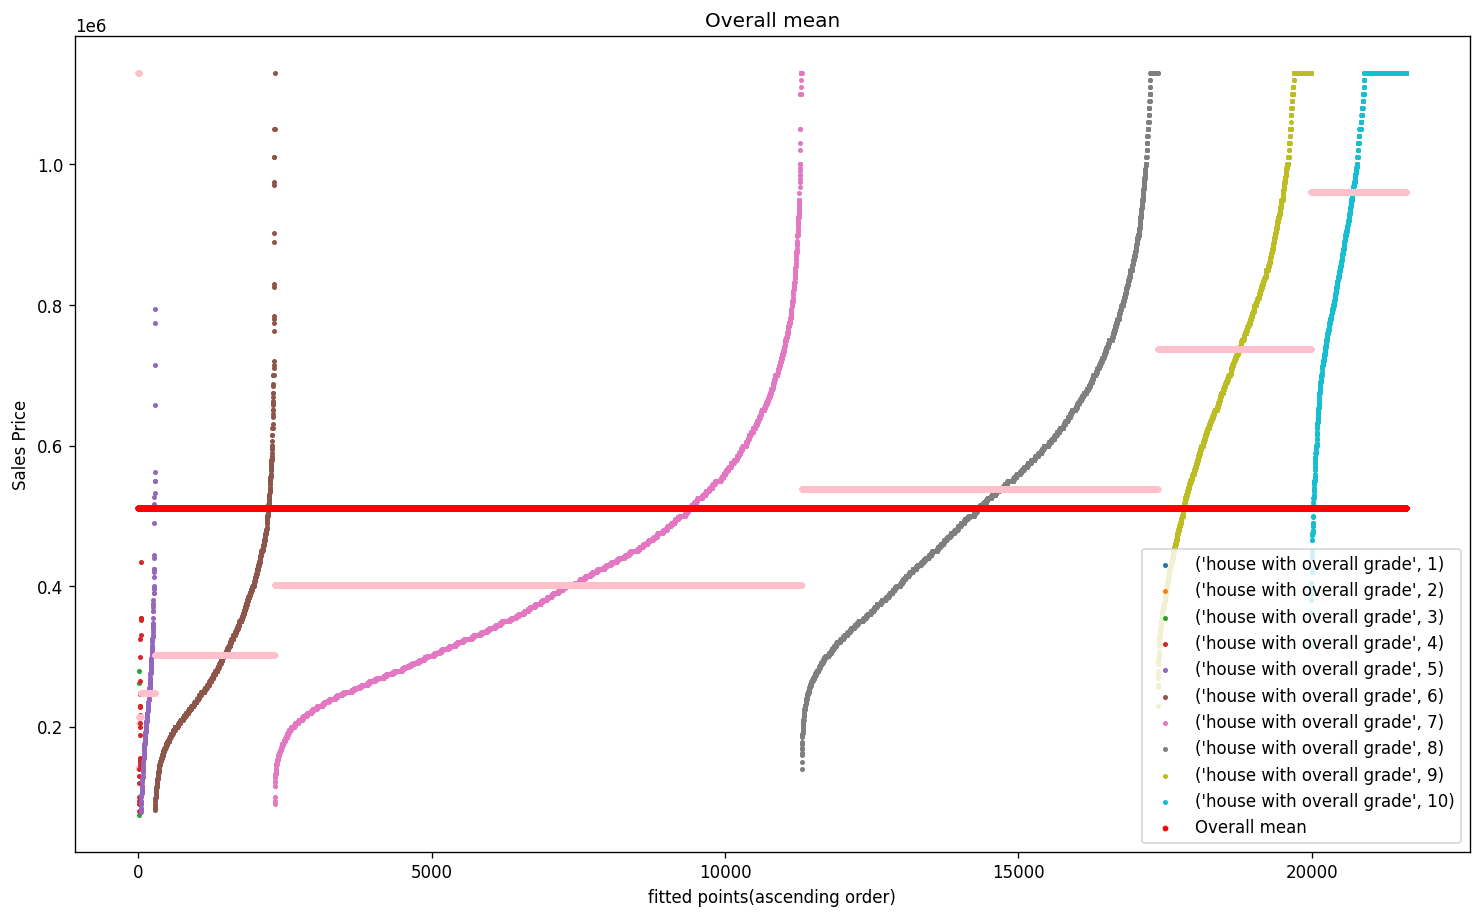

In [34]:
plt.figure(dpi=120,figsize=(15,9))
# plotting sale price gradewise
# z variable is for x axis
z = 0
for i in range(1,11):
  # defining x axis using z
  points = [k for k in range(z,z + len(gradewise_list[i-1]))] # all the points for x = 1
  #plotting
  plt.scatter(points,
              classwise_list[i-1].sort_values(), 
              label = ('house with overall grade' , i) , s = 4)
  # plotting gradewise mean
  plt.scatter(points,
              [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))], # mean price for that grade of house
              s=6,
              color = 'pink')
  z = max(points) + 1 
# plotting overall mean
plt.scatter([q for q in range(0,z)],
            data['mean_sales'],
            color = 'red',
            label = 'Overall mean',
            s = 6)
plt.xlabel('fitted points(ascending order)')
plt.ylabel('Sales Price')
plt.title('Overall mean')
plt.legend(loc = 4) # loc = 4 position of displaying of labels at bottom right

# Resudal Plot


In [35]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

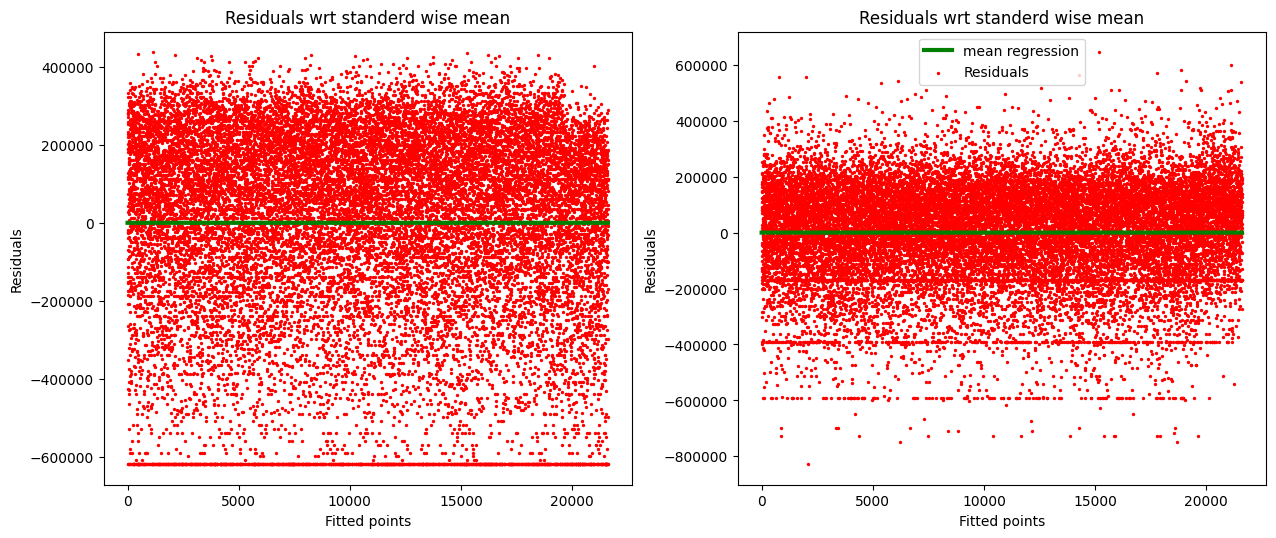

In [36]:
k = range(0,len(data))
l = [0 for i in range(0,len(data))] # for perfect model 

plt.figure( figsize=(15,6) , dpi = 100)

plt.subplot(1,2,1)
plt.scatter(k, mean_difference , color = 'red' , label = 'Residuals' , s = 2)
plt.plot( k , l , color = 'green' , label = 'mean regression' , linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.title('Residuals wrt standerd wise mean')

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference , color = 'red' , label = 'Residuals' , s = 2)
plt.plot( k , l , color = 'green' , label = 'mean regression' , linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals wrt standerd wise mean')

plt.legend()



# quatifiable matrices

In [38]:
cost = sum(mean_difference)/len(data)
print(round(cost,7))

0.0


In [41]:
Y = data['Sale_Price']
Y_hat1 = data['mean_sales']
Y_hat2 = data['grade_mean']
n = len(data)

len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [43]:
cost_mean = sum(abs(Y - Y_hat1))/n
round(cost_mean,6)

199168.781468

In [44]:
cost_grade_mean = sum(abs(Y - Y_hat2))/n
round(cost_grade_mean,6)

137081.702982

In [45]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y,Y_hat2)

137081.7029820291

In [49]:
from sklearn.metrics import mean_squared_error as mse
mse(Y,Y_hat1), mse(Y,Y_hat2)

(62528116847.799576, 30804835720.342426)

In [50]:
#RMSE
mse(Y,Y_hat1)**0.5, mse(Y,Y_hat2)**0.5

(250056.2273725643, 175513.06424406826)

In [51]:
Y = data['Sale_Price']
Y_bar = data['mean_sales']
Y_hat = data['grade_mean']
n = len(data)

In [52]:
mse_mean = mse(Y_bar,Y)
mse_model = mse(Y_hat,Y)
mse_mean, mse_model

(62528116847.799576, 30804835720.342426)

In [54]:
R2 = 1 - mse_model/mse_mean
round(R2,4)

0.5073